In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda

In [8]:
produtos = lista_produtos('C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Produtos/Planilha com Impostos.xlsm')
produtos.head()

,ID_Sku
0,74001
1,61580
2,10530
3,18615
4,67857


In [3]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda('7172')

c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
c:\Users\joaop\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arrays\masked.py:665: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


In [4]:
Venda.tail()

,SKU,Preco_Listado,Preco,Demanda,Log_Preco_Listado,Log_Preco,Log_Demanda,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,Log_Demanda_7D,promocionado_25,promocionado_50
Data,,,,,,,,,,,,,,,,,,,
2025-09-17,7172,509.00,308.10,23,6.232448,5.730424,3.135494,0,0,1,0,0,0,0,0,5.798374,3.575551,1,0
2025-09-18,7172,445.56,379.00,0,6.099332,5.937536,3.3771,0,0,0,1,0,0,0,0,5.819014,3.377100,0,0
2025-09-19,7172,509.00,374.58,7,6.232448,5.925805,1.94591,0,0,0,0,0,1,0,0,5.835637,3.252587,1,0
2025-09-20,7172,509.00,370.88,7,6.232448,5.915879,1.94591,0,0,0,0,0,0,1,0,5.849835,3.189888,1,0
2025-09-21,7172,509.00,371.42,5,6.232448,5.917333,1.609438,0,1,0,0,0,0,0,0,5.862527,3.084528,1,0


=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco   Demanda  Log_Preco  Log_Preco_Listado  Log_Demanda  \
count  1097.0000    1097.0  1097.0000          1097.0000       1097.0   
mean    297.5528   59.2935     5.6898             6.0933       3.7101   
std      32.1254  128.9603     0.1076             0.1114       0.7712   
min     185.3600       0.0     5.2223             5.6912       1.0986   
25%     275.4600      24.0     5.6184             6.0615       3.1781   
50%     293.2300      42.0     5.6810             6.1717       3.7377   
75%     318.0700      69.0     5.7623             6.1924       4.2341   
max     381.0100    3191.0     5.9428             6.2324       8.0681   

       Log_Preco_7D  Log_Demanda_7D  
count     1097.0000       1097.0000  
mean         5.6896          3.8031  
std          0.1003          0.6789  
min          5.3645          2.0053  
25%          5.6218          3.3168  
50%          5.6798          3.8130  
75

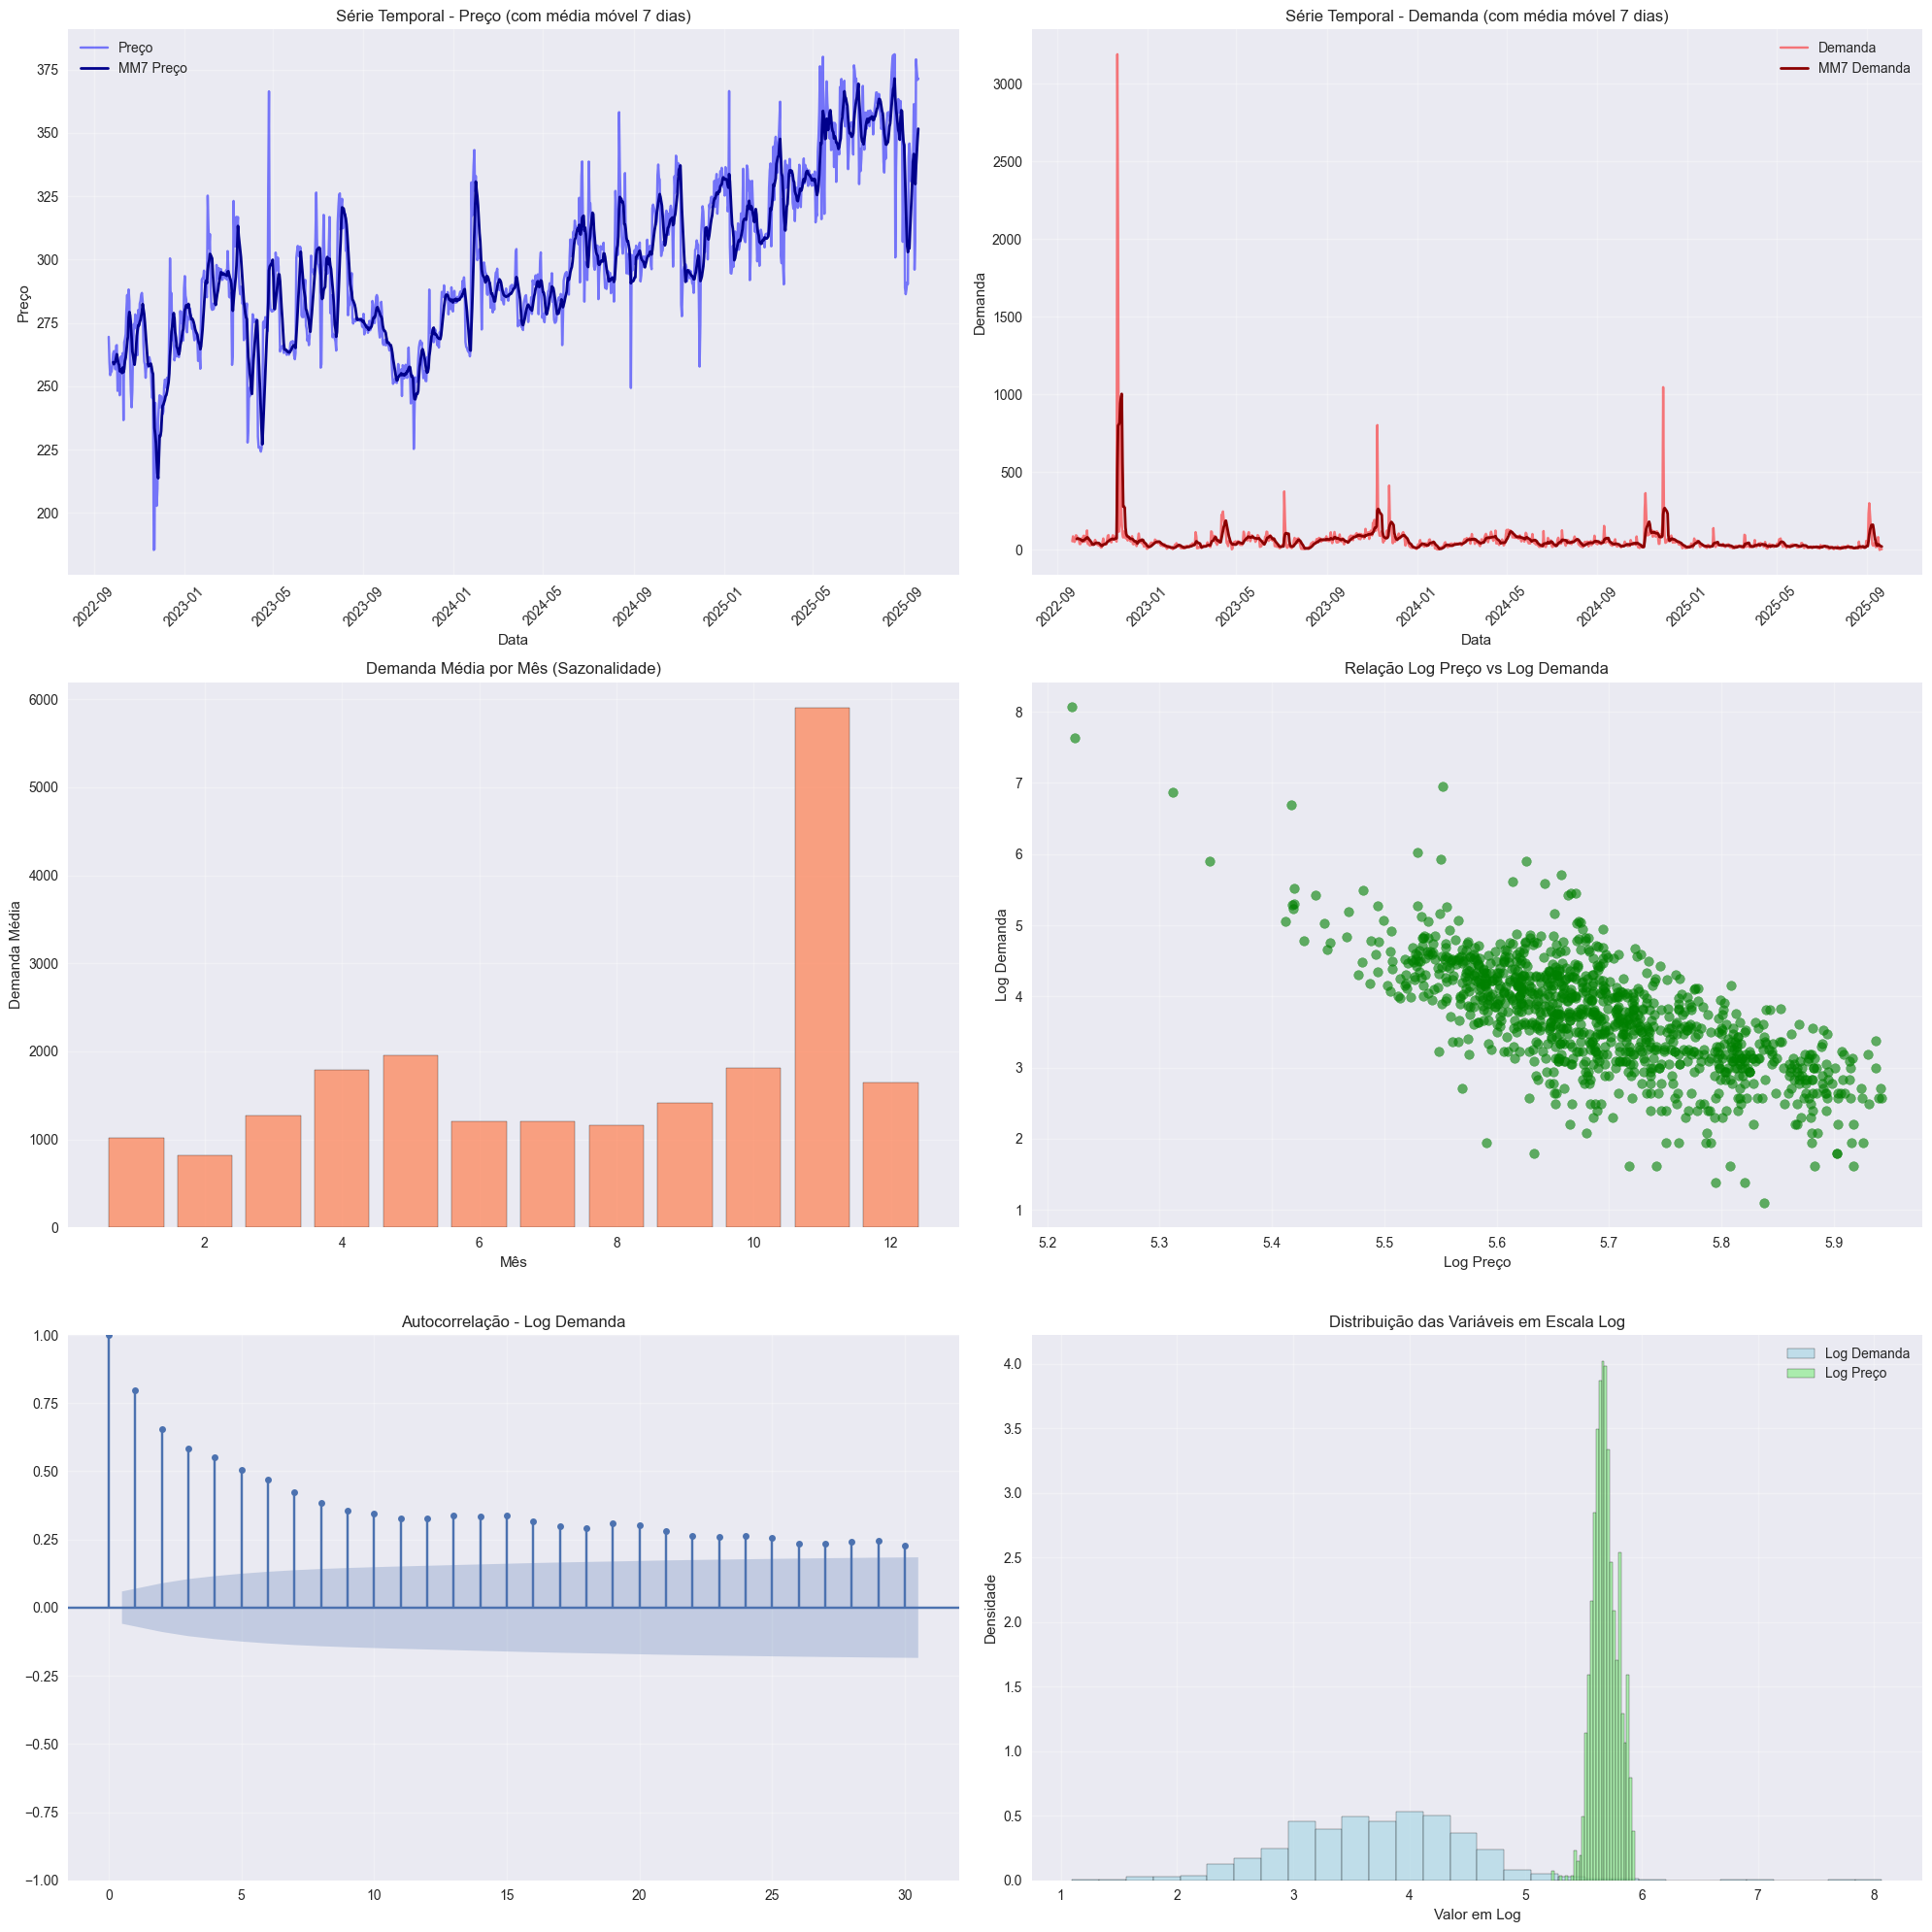

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.7091
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2022-09  260.058000      711   5.560751     4.241657
 1   2022-10  265.185161     1517   5.579159     3.775728
 2   2022-11  250.664000     8615   5.518190     4.650235
 3   2022-12  263.371613     1767   5.572131     3.920139
 4   2023-01  277.904194     1061   5.626527     3.411263
 5   2023-02  293.395000      591   5.680943     2.949246
 6   2023-03  283.633548     1231   5.644110     3.463641
 7   2023-04  267.952000     2422   5.584716     4.070361
 8   2023-05  272.689677     2154   5.607218     4.179816
 9   2023-06  289.950333     1572   5.668228     3.767679
 10  2023-07  291.666129     1599   5.673398     3.480653
 11  2023-08  289.581613     1422   5.666728     3.592199
 12  2023-09  275.104667     1975   5.616945     4.147224
 13  2023-10  257.608065     2889   5.551188     4.519359
 14  2023-11  257.092000     4539   5.548512     4.801911
 15  2023-12  277.811613     1675   5.626540     3.706341
 16  2024-01  

In [5]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,'7172')

In [6]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, '7172', 
    'Log_Preco', 'Black_Friday', 'promocionado_25',                                #Variáveis independentes
    'Quarta-feira', 'Terça-feira'
    ,var_dpd = 'Log_Demanda'                                                       #Variáveis dependentes
    ,n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado_25', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-01-06 a 2023-04-14
   RMSE: 0.5119, WAPE: 11.59%, R²: 0.4941
 Fold 2:
   Período teste: 2023-04-15 a 2023-07-22
   RMSE: 0.4934, WAPE: 10.25%, R²: 0.5112
 Fold 3:
   Período teste: 2023-07-23 a 2023-10-29
   RMSE: 0.4606, WAPE: 8.73%, R²: 0.5912
 Fold 4:
   Período teste: 2023-10-30 a 2024-02-05
   RMSE: 0.6597, WAPE: 13.72%, R²: 0.5734
 Fold 5:
   Período teste: 2024-02-06 a 2024-05-14
   RMSE: 0.5038, WAPE: 10.32%, R²: -0.2157
 Fold 6:
   Período teste: 2024-05-15 a 2024-08-21
   RMSE: 0.4434, WAPE: 9.80%, R²: 0.1024
 Fold 7:
   Período teste: 2024-08-22 a 2024-11-28
   RMSE: 0.6253, WAPE: 12.09%, R²: 0.0970
 Fold 8:
   Período teste: 2024-11-29 a 2025-03-07
   RMSE: 0.5407, WAPE: 11.64%, R²: 0.3405
 Fold 9:
   Período teste: 2025-03-08 a 2025-06-14
   RMSE: 0.5146, WAPE: 12.23%, R²: -0.3941
 Fold 10:
   Período teste: 2025-06-15 a 2025-09-21
   RMSE: 0.5880, WAPE

In [ ]:
from Functions.FNC_Previsoes import criar_predictor, prever_planilha


# Previsão a partir dos dados da planilha de preços para previsão
resultado_plan = prever_planilha(resultados_modelo_principal, 'C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Forecast/Precos_para_previsoes.xlsx')


Predictor inicializado com sucesso!
   Intercepto: 29.491642
   Log_Preco: -4.644080
   Black_Friday: 0.143775
   promocionado_25: 0.553523
   Quarta-feira: 0.147856
   Terça-feira: 0.190918


In [14]:
resultado_plan

,Data,SKU,Preco,promocionado_25,Black_Friday,Log_Demanda_Prevista,Demanda_Prevista
0,2025-09-18,7172,379.9,1,0,2.459756,11.701957
1,2025-09-19,7172,375.0,1,0,2.520046,12.429165
2,2025-09-20,7172,370.9,1,0,2.571101,13.080213
3,2025-09-21,7172,372.0,1,0,2.557348,12.901554
4,2025-09-22,7172,350.0,1,0,2.840454,17.123540
5,2025-09-23,7172,350.0,1,0,3.031372,20.725656
6,2025-09-24,7172,300.0,1,0,3.704198,40.617476
7,2025-09-25,7172,380.0,1,0,2.458534,11.687663


In [13]:
resultado_plan.to_excel('C:/Users/joaop/OneDrive/Desktop/Projetos Git/Forecast vendas e elasticidade/Resultados/Resultados_Previsoes.xlsx',index=False)